# song_info dataset overview

Summaries of columns, missing values, and row counts (excluding all_songs_data_processed.csv).

In [105]:
from pathlib import Path
import pandas as pd
from IPython.display import display


## Configure paths and files

In [106]:
data_dir_candidates = [
    Path('data') / 'song_info',
    Path('..') / 'data' / 'song_info',
]
for candidate in data_dir_candidates:
    if candidate.exists():
        data_dir = candidate
        break
else:
    raise FileNotFoundError('Could not find data/song_info directory')

files_to_check = [
    'tracks_features.csv',
]
data_dir, files_to_check

(PosixPath('../data/song_info'), ['tracks_features.csv'])

## Define helper function

In [107]:
def profile_csv(csv_path: Path):
    if not csv_path.exists():
        print(f'Missing file: {csv_path}')
        return
    df = pd.read_csv(csv_path)
    row_count, col_count = df.shape
    nulls = df.isna().sum()
    if row_count:
        missing_rate = (nulls / row_count).round(4)
    else:
        missing_rate = pd.Series(0, index=nulls.index)
    summary = pd.DataFrame({
        'column': df.columns,
        'dtype': df.dtypes.astype(str),
        'missing_count': nulls.values,
        'missing_rate': missing_rate.values,
    })
    print(f'File: {csv_path.name}')
    print(f'Rows: {row_count}, Columns: {col_count}')
    display(summary)
    print('' + '-'*80 + '')


## Run profiling

In [108]:
for file_name in files_to_check:
    csv_path = data_dir / file_name
    profile_csv(csv_path)


File: tracks_features.csv
Rows: 1204025, Columns: 24


,column,dtype,missing_count,missing_rate
id,id,object,0,0.0
name,name,object,3,0.0
album,album,object,11,0.0
album_id,album_id,object,0,0.0
artists,artists,object,0,0.0
artist_ids,artist_ids,object,0,0.0
track_number,track_number,int64,0,0.0
disc_number,disc_number,int64,0,0.0
explicit,explicit,bool,0,0.0
danceability,danceability,float64,0,0.0


--------------------------------------------------------------------------------


tracks_features rows: 1204025, columns: 24


,missing_count,missing_rate
album,11,0.0
name,3,0.0
id,0,0.0
mode,0,0.0
year,0,0.0
time_signature,0,0.0
duration_ms,0,0.0
tempo,0,0.0
valence,0,0.0
liveness,0,0.0


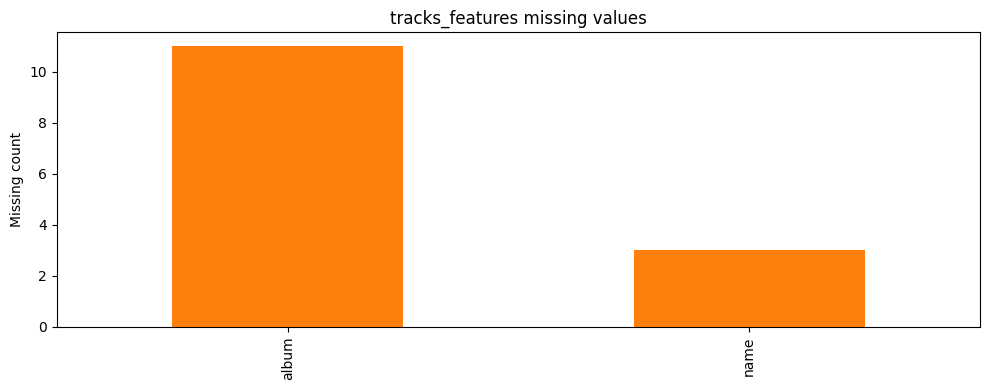

In [109]:
# tracks_features missing values analysis
import matplotlib.pyplot as plt

tracks_df = pd.read_csv(data_dir / 'tracks_features.csv')
tracks_missing = tracks_df.isna().sum().sort_values(ascending=False)
tracks_missing_rate = (tracks_missing / len(tracks_df)).round(4)
missing_summary = pd.DataFrame({
    'missing_count': tracks_missing,
    'missing_rate': tracks_missing_rate,
})
print(f'tracks_features rows: {len(tracks_df)}, columns: {tracks_df.shape[1]}')
display(missing_summary)

nonzero_missing = tracks_missing[tracks_missing > 0]
if not nonzero_missing.empty:
    plt.figure(figsize=(10, 4))
    nonzero_missing.plot(kind='bar', color='tab:orange')
    plt.title('tracks_features missing values')
    plt.ylabel('Missing count')
    plt.tight_layout()
    plt.show()
else:
    print('tracks_features has no missing values')


tracks_features year counts:


,count
year,
0,10
1900,14
1908,19
1909,25
1917,52
...,...
2016,47427
2017,51308
2018,56167


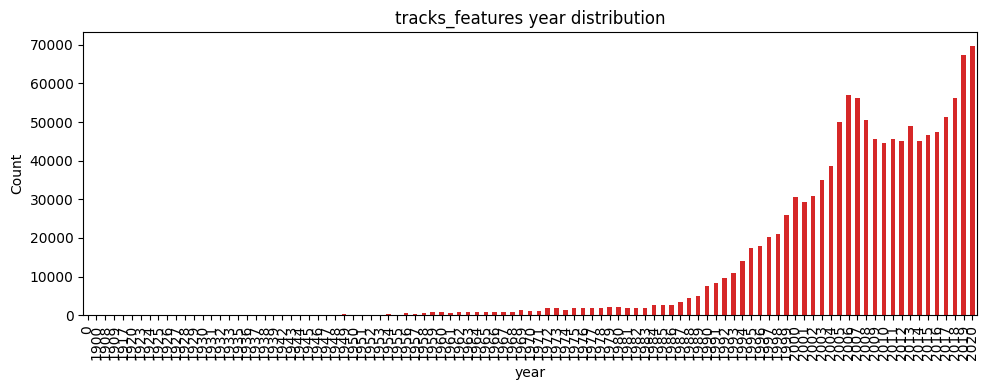

In [110]:
# tracks_features year distribution (prefer year, fallback to release_date)
import matplotlib.pyplot as plt

tracks_year_release = pd.read_csv(data_dir / 'tracks_features.csv', usecols=['year', 'release_date'])
explicit_year = pd.to_numeric(tracks_year_release['year'], errors='coerce')
fallback_year = pd.to_datetime(tracks_year_release['release_date'], errors='coerce').dt.year
combined_year = explicit_year.fillna(fallback_year).dropna().astype(int)
year_counts = combined_year.value_counts().sort_index()
print('tracks_features year counts:')
display(year_counts.to_frame(name='count'))

plt.figure(figsize=(10, 4))
year_counts.plot(kind='bar', color='tab:red')
plt.title('tracks_features year distribution')
plt.ylabel('Count')
plt.xlabel('year')
plt.tight_layout()
plt.show()


## Tracks features cleaning and distributions

In [111]:
# 载入并预处理 tracks_features
# Load and clean tracks_features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tracks_path = data_dir / 'tracks_features.csv'
df_tracks = pd.read_csv(tracks_path)
print(f'Original shape: {df_tracks.shape}')

# drop unnecessary columns if present
cols_to_drop = ['name', 'album', 'album_id', 'artists', 'artist_ids', 'track_number', 'disc_number', 'time_signature']
drop_existing = [c for c in cols_to_drop if c in df_tracks.columns]
df_tracks = df_tracks.drop(columns=drop_existing)

# ensure valence column name
if 'valance' in df_tracks.columns and 'valence' not in df_tracks.columns:
    df_tracks = df_tracks.rename(columns={'valance': 'valence'})


Original shape: (1204025, 24)


In [112]:
# 数值范围裁剪与离散化
# Clamp ranges and bin specific columns
range_cols = ['danceability', 'valence', 'energy']
for col in range_cols:
    if col in df_tracks.columns:
        df_tracks[col] = df_tracks[col].clip(lower=0, upper=1).round(2)

if 'instrumentalness' in df_tracks.columns:
    df_tracks['instrumentalness'] = np.where(df_tracks['instrumentalness'] > 0.5, 1, 0)

if 'liveness' in df_tracks.columns:
    df_tracks['liveness'] = np.where(df_tracks['liveness'] > 0.8, 1, 0)

if 'speechiness' in df_tracks.columns:
    df_tracks['speechiness'] = pd.cut(
        df_tracks['speechiness'],
        bins=[-np.inf, 0.33, 0.66, np.inf],
        labels=[0, 1, 2]
    ).astype(int)

if 'mode' in df_tracks.columns:
    df_tracks['mode'] = df_tracks['mode'].where(df_tracks['mode'].isin([0, 1]), np.nan)


In [113]:
# 清洗后数据概览
# Post-cleaning summary
print(f'Cleaned shape: {df_tracks.shape}')
display(df_tracks.head())


Cleaned shape: (1204025, 16)


,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,False,0.47,0.98,7,-5.399,1,0,0.02610,0,0,0.50,117.906,210133,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,True,0.60,0.96,11,-5.764,1,0,0.01290,0,0,0.49,103.680,206200,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,False,0.32,0.97,7,-5.424,1,1,0.02340,0,0,0.37,149.749,298893,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,True,0.44,0.97,11,-5.830,0,0,0.16300,0,0,0.57,96.752,213640,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,False,0.43,0.93,2,-6.729,1,0,0.00162,0,0,0.54,127.059,205600,1999,1999-11-02


In [114]:
# 规范时间列精度
# Normalize date/year precision
if 'year' in df_tracks.columns:
    year_series = df_tracks['year']
    year_num = pd.to_numeric(year_series, errors='coerce')
    year_date = pd.to_datetime(year_series, errors='coerce').dt.year
    year_final = year_num.where(~year_num.isna(), year_date)
    df_tracks['year'] = year_final.astype('Int64')

if 'release_date' in df_tracks.columns:
    df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date'], errors='coerce').dt.normalize()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204025 entries, 0 to 1204024
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   id                1204025 non-null  object        
 1   explicit          1204025 non-null  bool          
 2   danceability      1204025 non-null  float64       
 3   energy            1204025 non-null  float64       
 4   key               1204025 non-null  int64         
 5   loudness          1204025 non-null  float64       
 6   mode              1204025 non-null  int64         
 7   speechiness       1204025 non-null  int64         
 8   acousticness      1204025 non-null  float64       
 9   instrumentalness  1204025 non-null  int64         
 10  liveness          1204025 non-null  int64         
 11  valence           1204025 non-null  float64       
 12  tempo             1204025 non-null  float64       
 13  duration_ms       1204025 

,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,release_date
count,1204025,1204025,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1204025.0,1072839
unique,1204025,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
top,7lmeHLHBe4nmXzuXc0HDjk,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
freq,1,1121377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
mean,NaN,NaN,4.930519e-01,5.095340e-01,5.194151e+00,-1.180870e+01,6.714595e-01,5.320072e-02,4.467511e-01,3.057736e-01,2.334586e-02,4.280240e-01,1.176344e+02,2.488399e+05,2007.327815,2009-05-22 17:43:18.942432256
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.0,1900-01-01 00:00:00
25%,NaN,NaN,3.600000e-01,2.500000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,0.000000e+00,3.760000e-02,0.000000e+00,0.000000e+00,1.900000e-01,9.405400e+01,1.740900e+05,2002.0,2004-10-05 00:00:00
50%,NaN,NaN,5.000000e-01,5.200000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,0.000000e+00,3.890000e-01,0.000000e+00,0.000000e+00,4.000000e-01,1.167260e+02,2.243390e+05,2009.0,2010-06-25 00:00:00
75%,NaN,NaN,6.300000e-01,7.700000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,0.000000e+00,8.610000e-01,1.000000e+00,0.000000e+00,6.400000e-01,1.370460e+02,2.858400e+05,2015.0,2016-07-04 00:00:00
max,NaN,NaN,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,2.000000e+00,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,2020.0,2020-12-18 00:00:00


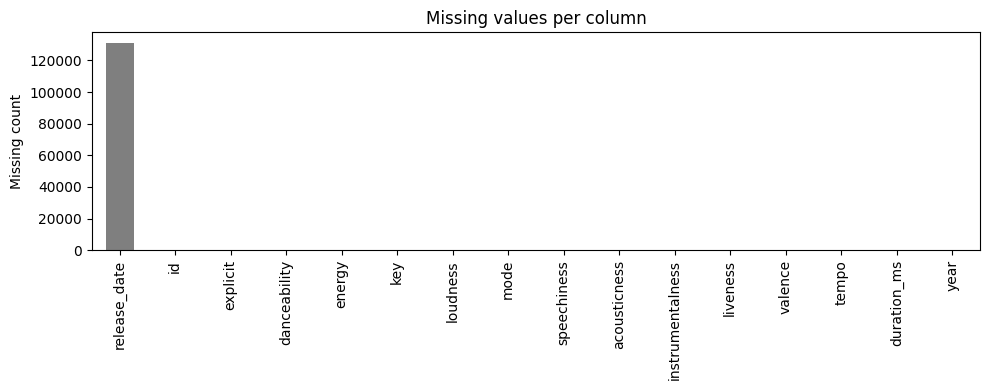

In [115]:
# 清洗后 info/describe 及缺失值可视化
# Post-cleaning info/describe and missing values
print('DataFrame info:')
df_tracks.info()
print('Describe:')
display(df_tracks.describe(include='all'))

missing_counts = df_tracks.isna().sum().sort_values(ascending=False)
plt.figure(figsize=(10,4))
missing_counts.plot(kind='bar', color='tab:gray')
plt.title('Missing values per column')
plt.ylabel('Missing count')
plt.tight_layout()
plt.show()


In [116]:
# 各列频次统计
# Value counts per column
for col in df_tracks.columns:
    counts = df_tracks[col].value_counts(dropna=False).head(20)
    print(f"Column: {col}")
    print(counts)


Column: id
id
7lmeHLHBe4nmXzuXc0HDjk    1
17tF8Uruqfi7tmaMjLSC2E    1
48Go4hiHT7u3MKuhQer9mH    1
2fnjA2YmbFzsOOGPpSk6JS    1
5T520kPr4PewLRuqAQO4xi    1
68LOSdEuxihkwdyoe9TrQE    1
2DcUK1VzDqqFi5VgkqHor9    1
546QIb1hvYsEYAlaXUXvmp    1
1imuxP340EEH4CSRpi3k7p    1
44Ok7uIkIafF8WgOyyNNsg    1
11aO0WItP9zFJ65NTSi2el    1
1ueRn7E7i30qjipXiAkPVC    1
0orS12NU8Lu5DJrvBpk1of    1
76urEkWTfp70wzHqlRn9U8    1
6c4NgJ9R5m9Cnz1V9nusmW    1
1gRmH546T8xGrLPrxqQoj6    1
5W4h8wD9tiwJ83Zgmi3rfC    1
0hU3cModY1ATLT2c3BezpS    1
6y7LlLDBMvY7erjGyu4klB    1
2yU84KjkwIDqHLDCCSr0Xa    1
Name: count, dtype: int64
Column: explicit
explicit
False    1121377
True       82648
Name: count, dtype: int64
Column: danceability
danceability
0.52    25721
0.50    25692
0.56    25418
0.48    25152
0.46    24490
0.60    24473
0.44    23630
0.54    23453
0.62    23430
0.55    23218
0.57    23014
0.42    22952
0.58    22811
0.64    21940
0.40    21562
0.53    21539
0.51    21067
0.49    20817
0.66    20591
0.38    20520


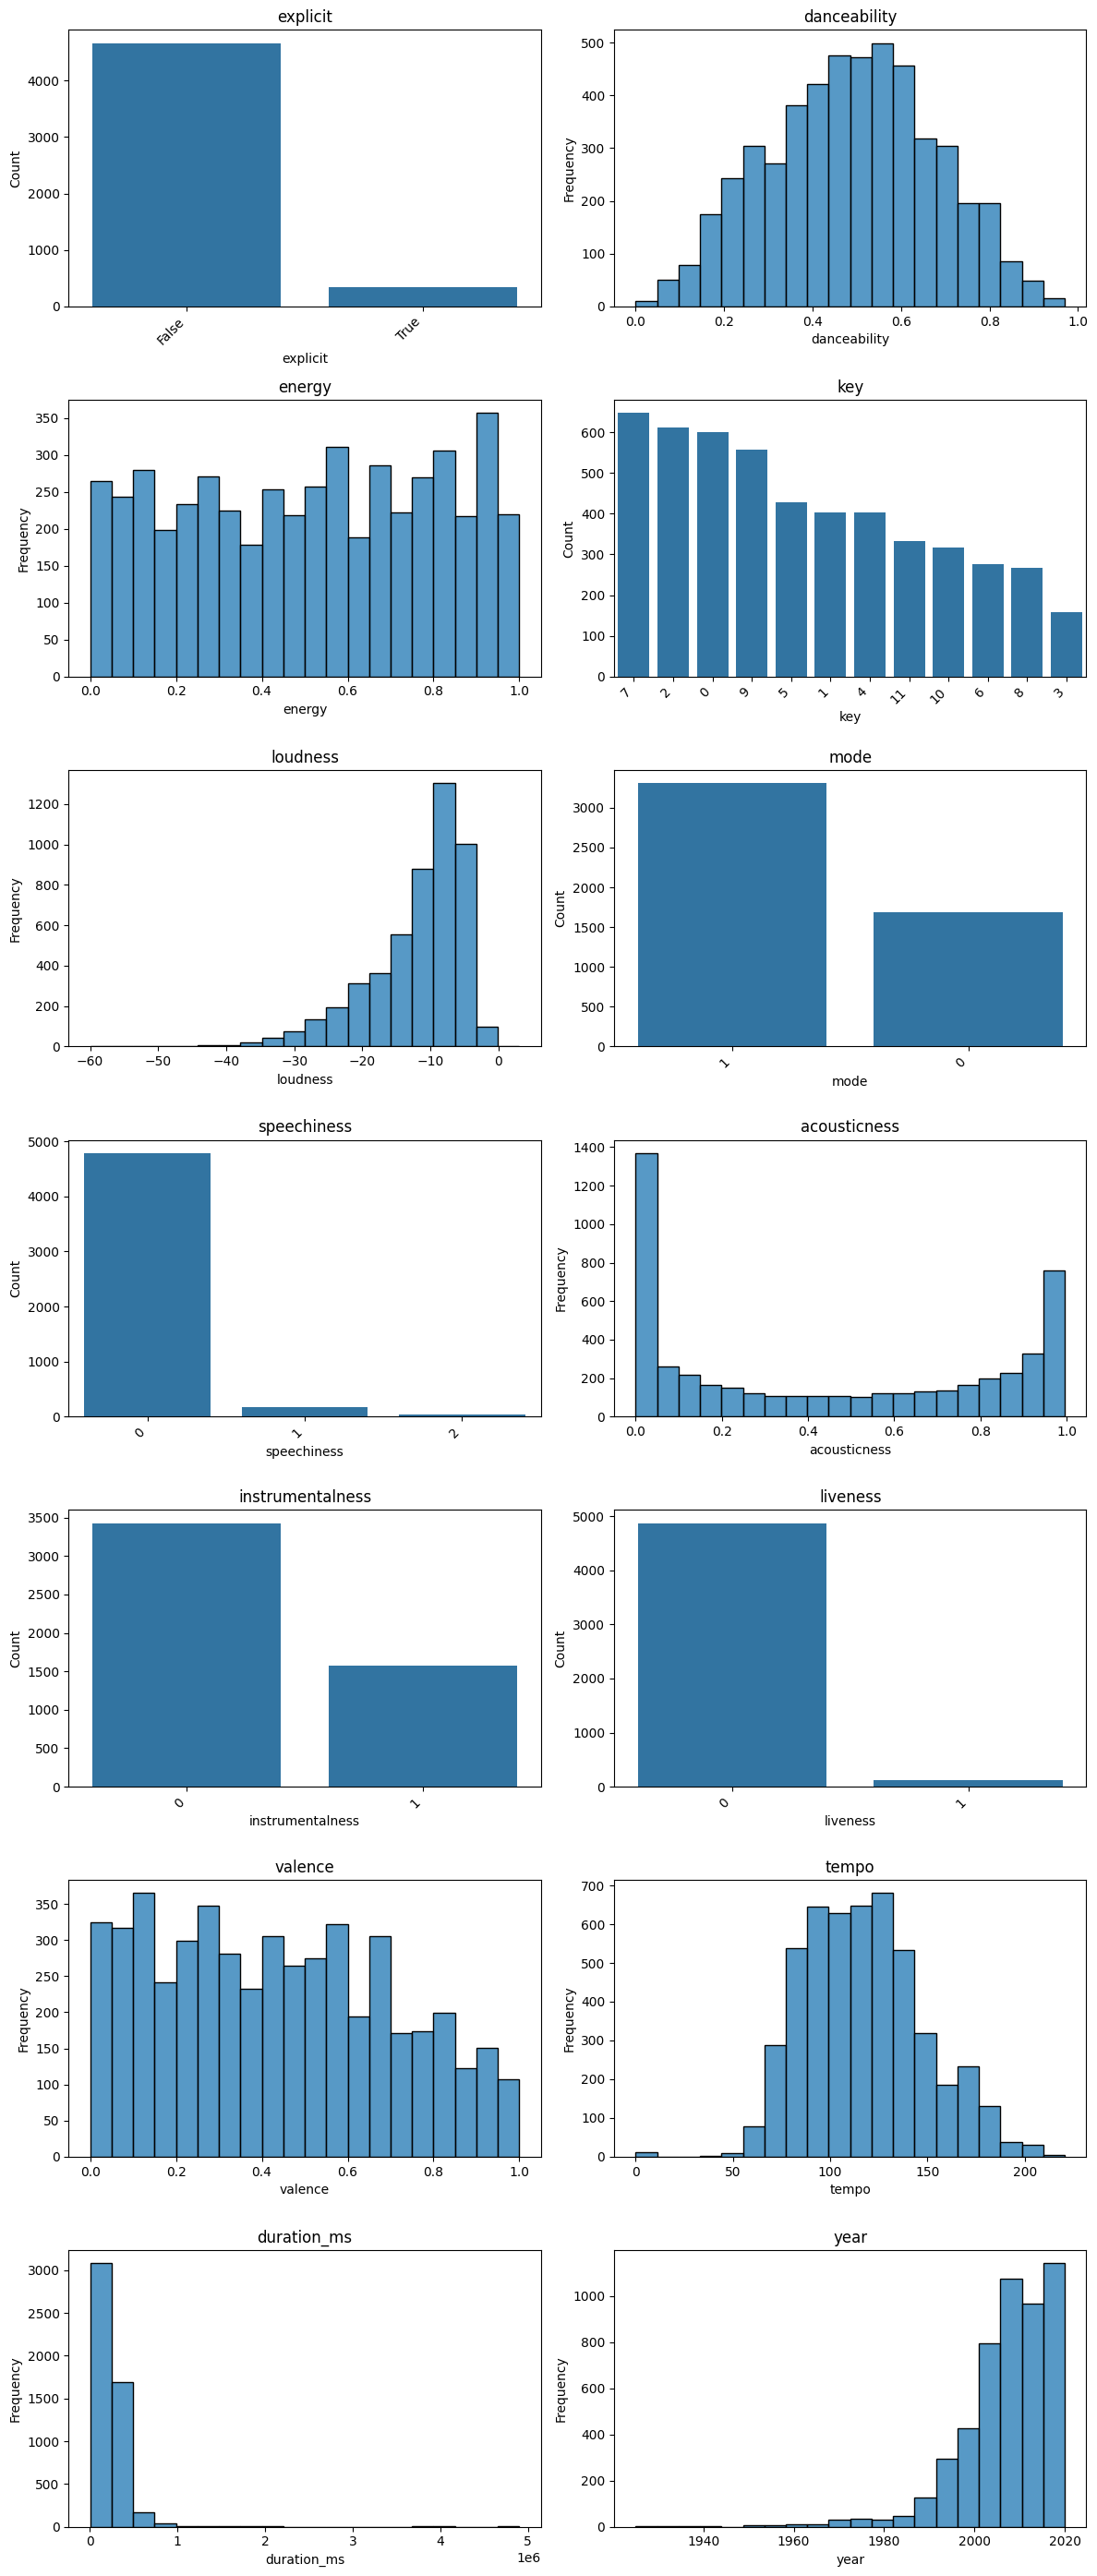

In [117]:
# 可视化：频次/分布（采样+限类+降开销）
# Visualize distributions per column with sampling and capped categories
# 采样（可复现）
df_plot = df_tracks.sample(n=min(5000, len(df_tracks)), random_state=42)

exclude_cols = ['id', 'release_date']
plot_cols = [c for c in df_plot.columns if c not in exclude_cols]
n_cols = 2
n_rows = int(np.ceil(len(plot_cols)/n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()

# 预先计算 nunique
nunique_map = df_plot.nunique(dropna=False)

for ax, col in zip(axes, plot_cols):
    series = df_plot[col]
    nunique = nunique_map[col]
    if nunique <= 20:
        counts = series.value_counts(dropna=False).head(20)
        sns.barplot(x=counts.index.astype(str), y=counts.values, ax=ax)
        ax.set_ylabel('Count')
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    else:
        sns.histplot(series.dropna(), bins=20, kde=False, ax=ax)
        ax.set_ylabel('Frequency')
    ax.set_title(col)

for ax in axes[len(plot_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Decade-level sampling metrics
Compute decade-based rates (explicit=True, mode=1, instrumentalness=1) with up to 10k sampled rows per decade; unsampled (small) decades marked in red.

In [118]:
# 按年代计算指标并采样（>=1900）
# Compute decade-level metrics with sampling (>=1900)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# decade 列
df_temp = df_tracks.copy()
df_temp = df_temp[df_temp['year'].notna()].copy()
df_temp['decade'] = (df_temp['year'].astype(int) // 10) * 10
# 仅保留1900年后的年代
df_temp = df_temp[df_temp['decade'] >= 1900]

metrics = []
palette = sns.color_palette('tab10', n_colors=10)
decades = sorted(df_temp['decade'].unique())
color_map = {dec: palette[i % len(palette)] for i, dec in enumerate(decades)}

for dec in decades:
    dec_df = df_temp[df_temp['decade'] == dec]
    total = len(dec_df)
    if total == 0:
        continue
    sampled = total > 10000
    sample_df = dec_df.sample(10000, random_state=42) if sampled else dec_df
    metrics.append({
        'decade': dec,
        'sampled': sampled,
        'color': 'red' if not sampled else color_map[dec],
        'explicit_true_rate': sample_df['explicit'].eq(True).mean() if 'explicit' in sample_df.columns else np.nan,
        'mode_one_rate': sample_df['mode'].eq(1).mean() if 'mode' in sample_df.columns else np.nan,
        'instrumentalness_one_rate': sample_df['instrumentalness'].eq(1).mean() if 'instrumentalness' in sample_df.columns else np.nan,
        'danceability_mean': sample_df['danceability'].mean() if 'danceability' in sample_df.columns else np.nan,
        'energy_mean': sample_df['energy'].mean() if 'energy' in sample_df.columns else np.nan,
        'speechiness_mean': sample_df['speechiness'].mean() if 'speechiness' in sample_df.columns else np.nan,
        'acousticness_mean': sample_df['acousticness'].mean() if 'acousticness' in sample_df.columns else np.nan,
        'liveness_mean': sample_df['liveness'].mean() if 'liveness' in sample_df.columns else np.nan,
        'valence_mean': sample_df['valence'].mean() if 'valence' in sample_df.columns else np.nan,
        'tempo_mean': sample_df['tempo'].mean() if 'tempo' in sample_df.columns else np.nan,
        'duration_ms_mean': sample_df['duration_ms'].mean() if 'duration_ms' in sample_df.columns else np.nan,
    })

metrics_df = pd.DataFrame(metrics)
metrics_df = metrics_df.sort_values('decade')
display(metrics_df)


,decade,sampled,color,explicit_true_rate,mode_one_rate,instrumentalness_one_rate,danceability_mean,energy_mean,speechiness_mean,acousticness_mean,liveness_mean,valence_mean,tempo_mean,duration_ms_mean
0,1900,False,red,0.000000,0.775862,0.275862,0.580690,0.431897,0.000000,0.702805,0.017241,0.672414,122.510534,270391.724138
1,1910,False,red,0.000000,0.615385,0.384615,0.507115,0.254231,0.038462,0.810928,0.019231,0.481346,118.500192,259703.826923
2,1920,False,red,0.000000,0.785249,0.342733,0.612516,0.267657,0.015184,0.950089,0.023861,0.627722,114.993787,187553.164859
3,1930,False,red,0.000000,0.757174,0.216336,0.571943,0.324857,0.123620,0.847675,0.048565,0.572141,117.773627,173954.006623
4,1940,False,red,0.000000,0.800919,0.208270,0.419142,0.242527,0.033691,0.894839,0.016845,0.401975,113.183619,208679.863706
5,1950,False,red,0.000000,0.745489,0.314973,0.426540,0.297034,0.050016,0.834379,0.029756,0.424565,110.035120,250646.218107
6,1960,False,red,0.001594,0.756148,0.280396,0.433270,0.350417,0.036088,0.701352,0.035178,0.456245,111.949954,232709.076958
7,1970,True,"(0.4980392156862745, 0.4980392156862745, 0.498...",0.000500,0.751100,0.217600,0.480832,0.453596,0.031100,0.529771,0.047300,0.512642,116.759895,254610.571500
8,1980,True,"(0.7372549019607844, 0.7411764705882353, 0.133...",0.012800,0.704400,0.274500,0.479287,0.467671,0.027200,0.472574,0.031100,0.474897,117.036191,257565.013100
9,1990,True,"(0.09019607843137255, 0.7450980392156863, 0.81...",0.029300,0.708100,0.350500,0.464175,0.405994,0.047700,0.558273,0.025300,0.425529,114.370254,255306.475900


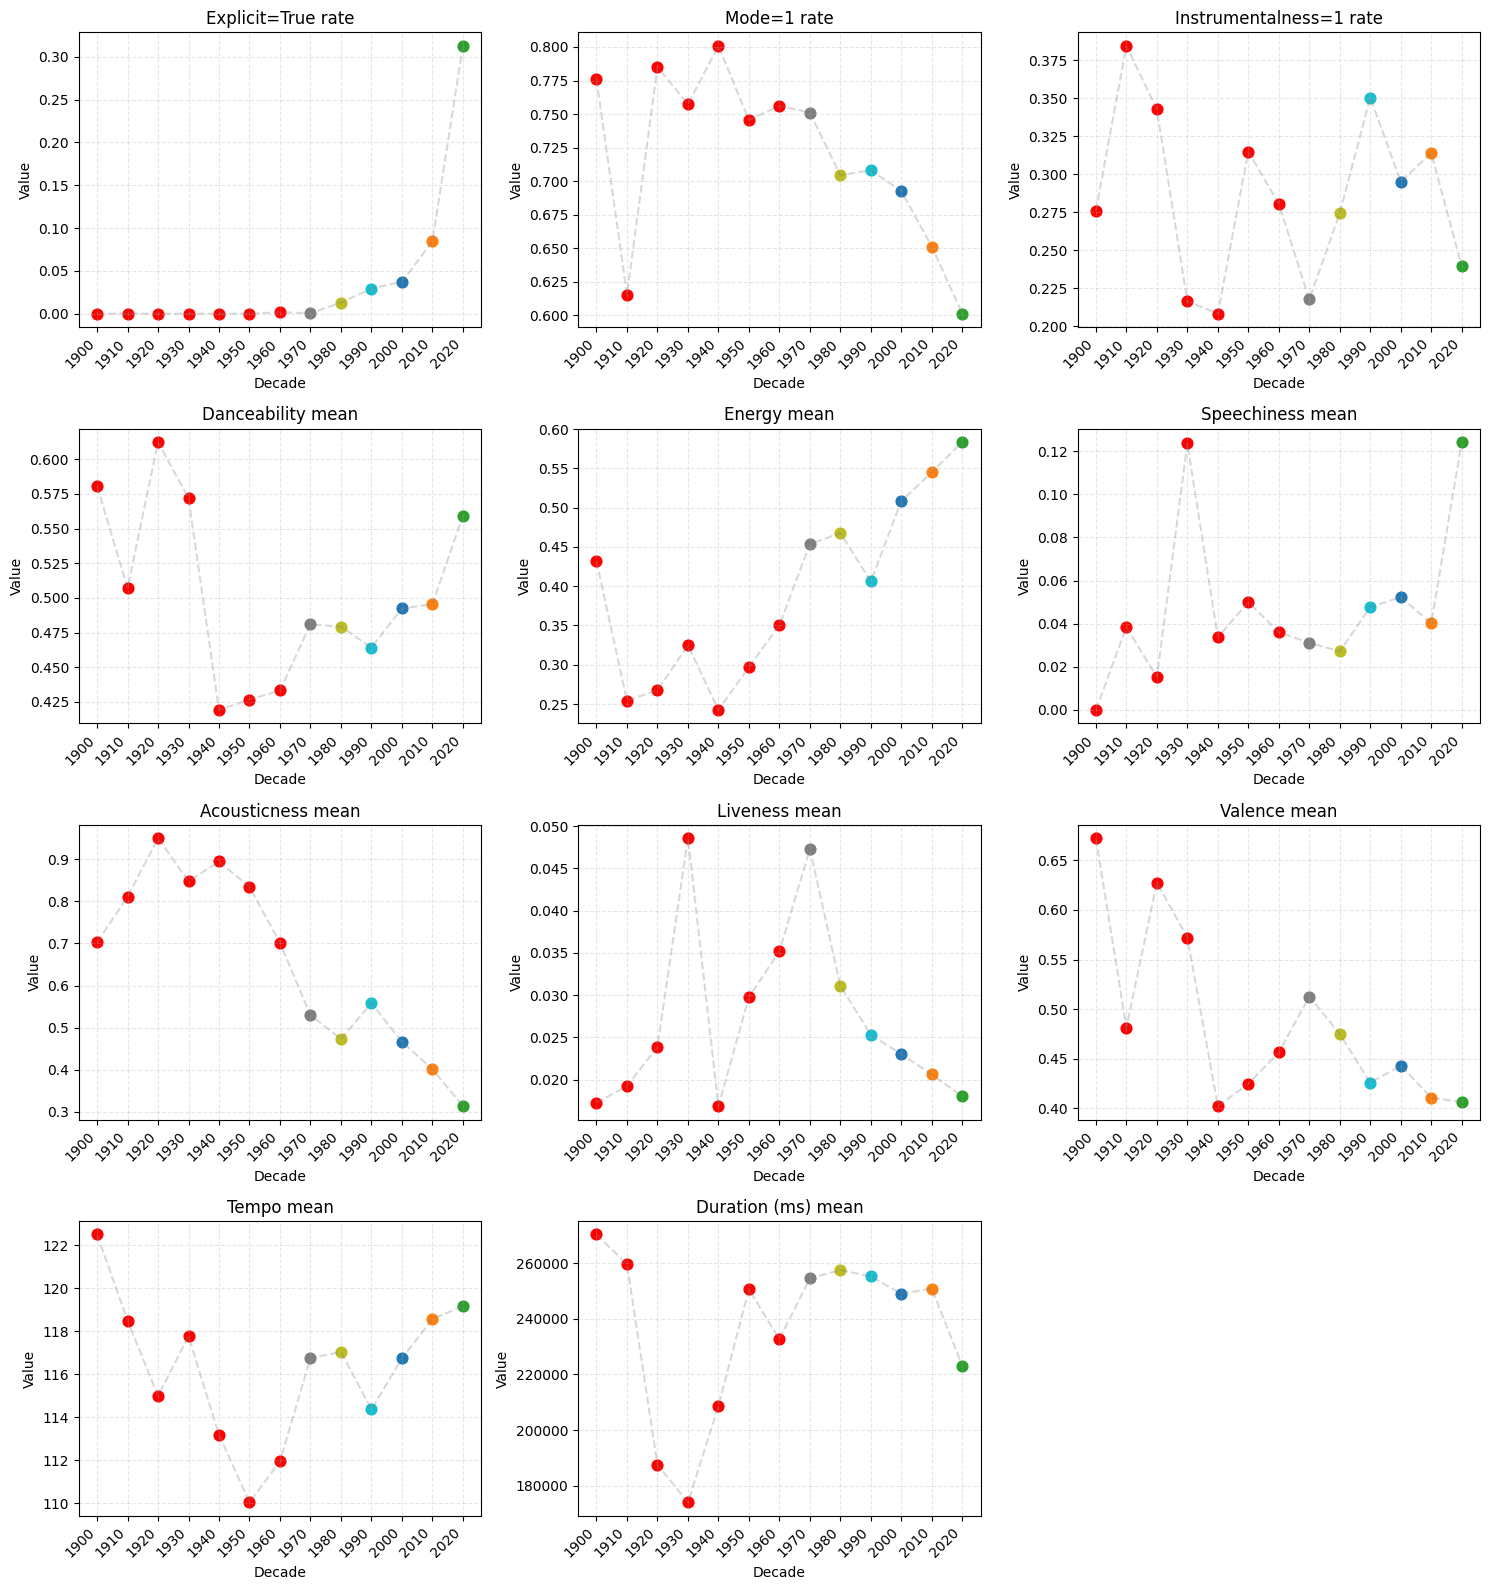

In [119]:
# 可视化年代变化（采样不足用红色）
# Plot decade trends (red denotes no sampling applied)
plot_cols = [
    ('explicit_true_rate', 'Explicit=True rate'),
    ('mode_one_rate', 'Mode=1 rate'),
    ('instrumentalness_one_rate', 'Instrumentalness=1 rate'),
    ('danceability_mean', 'Danceability mean'),
    ('energy_mean', 'Energy mean'),
    ('speechiness_mean', 'Speechiness mean'),
    ('acousticness_mean', 'Acousticness mean'),
    ('liveness_mean', 'Liveness mean'),
    ('valence_mean', 'Valence mean'),
    ('tempo_mean', 'Tempo mean'),
    ('duration_ms_mean', 'Duration (ms) mean'),
]

n_cols = 3
n_rows = int(np.ceil(len(plot_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for ax, (col, title) in zip(axes, plot_cols):
    ax.plot(metrics_df['decade'], metrics_df[col], color='gray', alpha=0.3, linestyle='--')
    for _, row in metrics_df.iterrows():
        ax.scatter(row['decade'], row[col], color=row['color'], s=60)
    ax.set_title(title)
    ax.set_xlabel('Decade')
    ax.set_ylabel('Value')
    ax.set_xticks(metrics_df['decade'])
    ax.set_xticklabels(metrics_df['decade'], rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.3)

for ax in axes[len(plot_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Two-year period metrics (>=1970, no sampling)
Remove low-sample decades and recompute metrics on full data with 2-year bins starting 1970.

In [120]:
# 按2年区间重新计算指标（>=1970，不采样）
# Recompute metrics on 2-year bins from 1970 without sampling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 过滤年份并创建2年区间
_df = df_tracks.copy()
_df = _df[_df['year'].notna()].copy()
_df['year'] = pd.to_numeric(_df['year'], errors='coerce')
_df = _df[_df['year'] >= 1970]
_df['period'] = (_df['year'] // 2 * 2).astype(int)

metrics2 = []
periods = sorted(_df['period'].unique())
palette = sns.color_palette('tab20', n_colors=len(periods))
color_map = {p: palette[i % len(palette)] for i, p in enumerate(periods)}

for p in periods:
    sub = _df[_df['period'] == p]
    total = len(sub)
    if total == 0:
        continue
    metrics2.append({
        'period': p,
        'color': color_map[p],
        'explicit_true_rate': sub['explicit'].eq(True).mean() if 'explicit' in sub.columns else np.nan,
        'mode_one_rate': sub['mode'].eq(1).mean() if 'mode' in sub.columns else np.nan,
        'instrumentalness_one_rate': sub['instrumentalness'].eq(1).mean() if 'instrumentalness' in sub.columns else np.nan,
        'danceability_mean': sub['danceability'].mean() if 'danceability' in sub.columns else np.nan,
        'energy_mean': sub['energy'].mean() if 'energy' in sub.columns else np.nan,
        'speechiness_mean': sub['speechiness'].mean() if 'speechiness' in sub.columns else np.nan,
        'acousticness_mean': sub['acousticness'].mean() if 'acousticness' in sub.columns else np.nan,
        'liveness_mean': sub['liveness'].mean() if 'liveness' in sub.columns else np.nan,
        'valence_mean': sub['valence'].mean() if 'valence' in sub.columns else np.nan,
        'tempo_mean': sub['tempo'].mean() if 'tempo' in sub.columns else np.nan,
        'duration_ms_mean': sub['duration_ms'].mean() if 'duration_ms' in sub.columns else np.nan,
    })

metrics2_df = pd.DataFrame(metrics2).sort_values('period')
display(metrics2_df)


,period,color,explicit_true_rate,mode_one_rate,instrumentalness_one_rate,danceability_mean,energy_mean,speechiness_mean,acousticness_mean,liveness_mean,valence_mean,tempo_mean,duration_ms_mean
0,1970,"(0.12156862745098039, 0.4666666666666667, 0.70...",0.000000,0.767301,0.227509,0.458581,0.413426,0.035467,0.575441,0.039360,0.493460,114.575933,251828.678201
1,1972,"(0.6823529411764706, 0.7803921568627451, 0.909...",0.000000,0.772162,0.192432,0.474368,0.442532,0.043514,0.565463,0.051622,0.516127,116.359419,255359.753784
2,1974,"(1.0, 0.4980392156862745, 0.054901960784313725)",0.000626,0.749609,0.210329,0.469380,0.442266,0.025665,0.537031,0.058529,0.495565,116.499634,257397.609390
3,1976,"(1.0, 0.7333333333333333, 0.47058823529411764)",0.000507,0.756017,0.208006,0.490760,0.461872,0.020269,0.521940,0.051178,0.524013,118.054411,247515.918926
4,1978,"(0.17254901960784313, 0.6274509803921569, 0.17...",0.000993,0.726235,0.231571,0.501323,0.488784,0.034252,0.470489,0.038967,0.523872,118.116557,257423.576818
5,1980,"(0.596078431372549, 0.8745098039215686, 0.5411...",0.004482,0.726594,0.177540,0.508845,0.521175,0.025647,0.409113,0.050548,0.533464,121.110505,250596.085159
6,1982,"(0.8392156862745098, 0.15294117647058825, 0.15...",0.002412,0.716698,0.227821,0.523961,0.527467,0.023854,0.385772,0.029751,0.540158,119.308617,248667.299116
7,1984,"(1.0, 0.596078431372549, 0.5882352941176471)",0.001935,0.688020,0.243081,0.490341,0.492706,0.052835,0.431470,0.033288,0.482053,118.466862,256015.866073
8,1986,"(0.5803921568627451, 0.403921568627451, 0.7411...",0.026155,0.719583,0.279258,0.480415,0.469767,0.027976,0.465354,0.031286,0.466659,117.064206,260547.124317
9,1988,"(0.7725490196078432, 0.6901960784313725, 0.835...",0.014419,0.694813,0.365871,0.447167,0.403066,0.015975,0.560390,0.025934,0.433339,114.491264,261492.261307


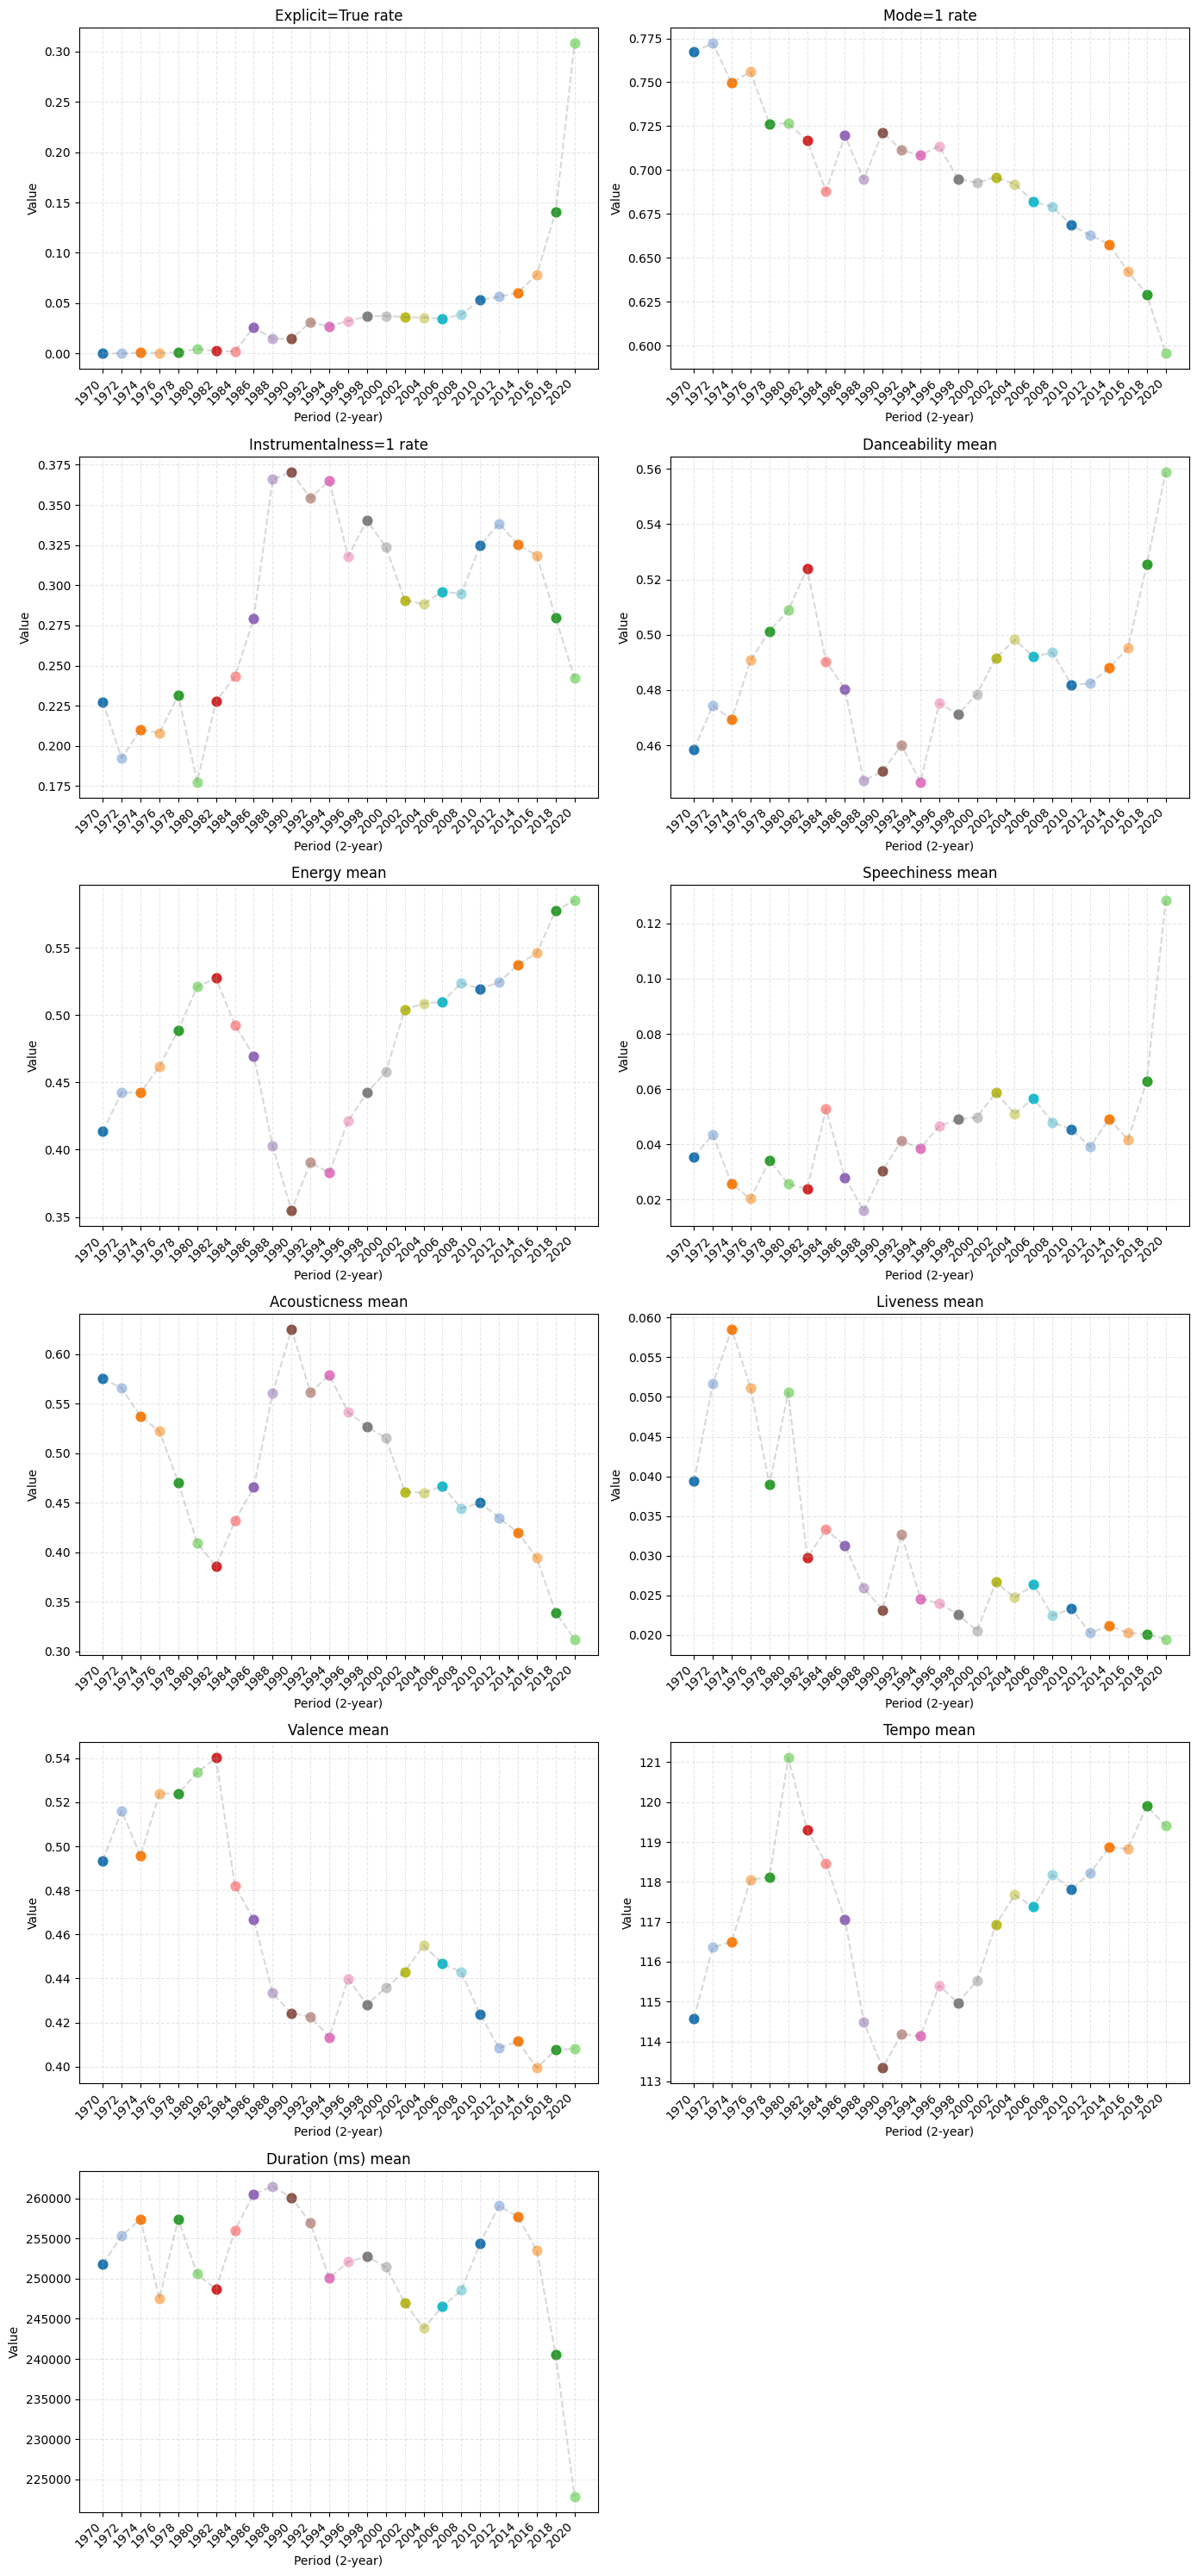

In [121]:
# 2年区间指标可视化
# Plot 2-year period trends
plot_cols = [
    ('explicit_true_rate', 'Explicit=True rate'),
    ('mode_one_rate', 'Mode=1 rate'),
    ('instrumentalness_one_rate', 'Instrumentalness=1 rate'),
    ('danceability_mean', 'Danceability mean'),
    ('energy_mean', 'Energy mean'),
    ('speechiness_mean', 'Speechiness mean'),
    ('acousticness_mean', 'Acousticness mean'),
    ('liveness_mean', 'Liveness mean'),
    ('valence_mean', 'Valence mean'),
    ('tempo_mean', 'Tempo mean'),
    ('duration_ms_mean', 'Duration (ms) mean'),
]

n_cols = 2
n_rows = int(np.ceil(len(plot_cols) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))
axes = axes.flatten()

for ax, (col, title) in zip(axes, plot_cols):
    ax.plot(metrics2_df['period'], metrics2_df[col], color='gray', alpha=0.3, linestyle='--')
    for _, row in metrics2_df.iterrows():
        ax.scatter(row['period'], row[col], color=row['color'], s=60)
    ax.set_title(title)
    ax.set_xlabel('Period (2-year)')
    ax.set_ylabel('Value')
    ax.set_xticks(metrics2_df['period'])
    ax.set_xticklabels(metrics2_df['period'], rotation=45, ha='right')
    ax.grid(True, linestyle='--', alpha=0.3)

for ax in axes[len(plot_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Release date season/day distributions and society info trends

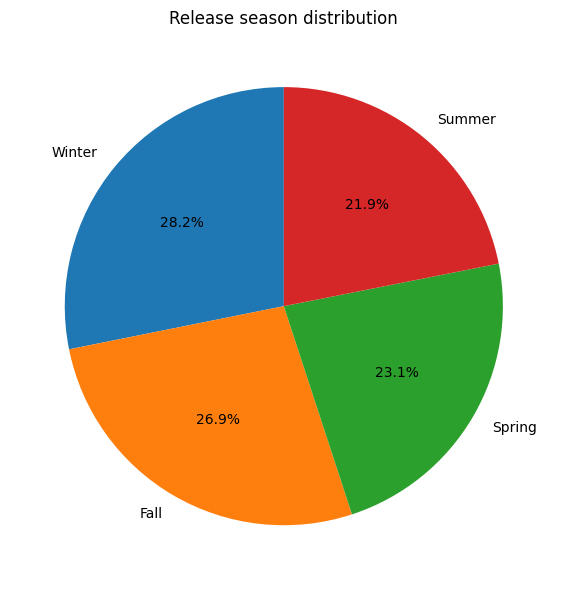

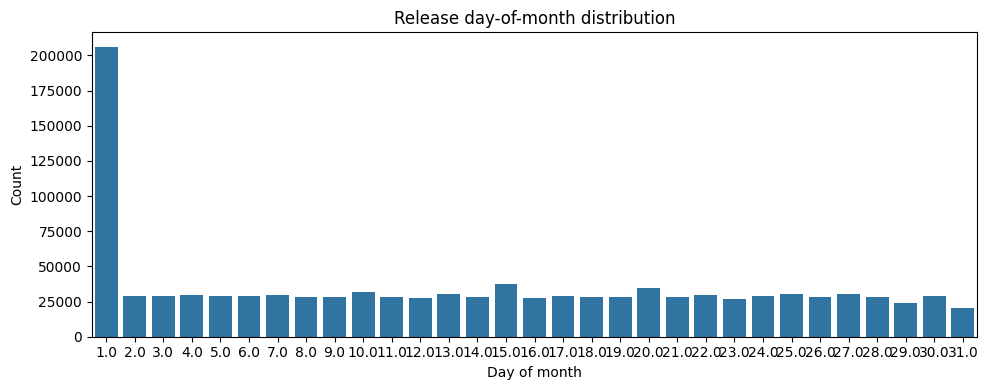

In [122]:
# 季节与日分布（release_date）
# Season and day-of-month distributions for release_date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_release = df_tracks.copy()
if 'release_date' not in df_release.columns:
    raise ValueError('release_date column missing')

release_dt = pd.to_datetime(df_release['release_date'], errors='coerce')
df_release['month'] = release_dt.dt.month

def month_to_season(m):
    if pd.isna(m):
        return pd.NA
    m = int(m)
    if m in [12,1,2]:
        return 'Winter'
    if m in [3,4,5]:
        return 'Spring'
    if m in [6,7,8]:
        return 'Summer'
    if m in [9,10,11]:
        return 'Fall'
    return pd.NA

df_release['season'] = df_release['month'].apply(month_to_season)

season_counts = df_release['season'].value_counts(dropna=True)
plt.figure(figsize=(6,6))
plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Release season distribution')
plt.tight_layout()
plt.show()

# Day-of-month distribution

df_release['day'] = release_dt.dt.day
if df_release['day'].notna().any():
    day_counts = df_release['day'].value_counts().sort_index()
    plt.figure(figsize=(10,4))
    sns.barplot(x=day_counts.index, y=day_counts.values, color='tab:blue')
    plt.title('Release day-of-month distribution')
    plt.xlabel('Day of month')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('No valid release_date to compute day distribution')
